## Zero Coupon Curves on the Refinitiv Data Platform

A few examples of how to generate Zero Coupon curves with Instrument Pricing Analytics APIs - using the RDP Library


Opening an RDP platform session

In [1]:
import json
import refinitiv.dataplatform as rdp
import configparser as cp
from IPython.display import HTML
import pandas as pd

%run -i c:/Refinitiv/credentials.ipynb
%run "plotting_helper.ipynb"

In [2]:
session = rdp.PlatformSession(
    get_app_key(),
    rdp.GrantPassword(
        get_rdp_login2(),
        get_rdp_password()
    )
)

session.open()

<State.Open: 3>

#### Define our API Endpoints for the ZC Curve definitions and ZC Curves data

In [3]:
zcCurveDefinitions_endpoint = rdp.Endpoint(session, 
    'https://api.refinitiv.com/data/quantitative-analytics-curves-and-surfaces/v1/curves/zc-curve-definitions')

zcCurve_endpoint = rdp.Endpoint(session, 
    'https://api.refinitiv.com/data/quantitative-analytics-curves-and-surfaces/v1/curves/zc-curves')

### Getting Curve Definitions
Request a list of Curve Definitions based on query parameters e.g Currency

In [4]:
request_body={
  "universe": [
    {
      "currency": "EUR"
    }
  ]
}

response = zcCurveDefinitions_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body
)

df = pd.DataFrame(data=response.data.raw["data"][0]["curveDefinitions"])
df

,id,mainConstituentAssetClass,riskType,name,currency,indexName,source,firstHistoricalAvailabilityDate,availableTenors
0,9d619112-9ab3-45c9-b83c-eb04cbec382e,Swap,InterestRate,EUR EURIBOR Swap ZC Curve,EUR,EURIBOR,Refinitiv,2008-07-14,"[1M, 3M, 6M, 1Y, OIS]"


#### Requesting a curve by its ID

In [5]:
request_body = {
    "universe": [
        {
            "curveDefinition": {
                "id": "9d619112-9ab3-45c9-b83c-eb04cbec382e",
                "discountingTenor": "1M"
            }
        }]
}

response = zcCurve_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body
)

#### Detailed Response - curve points data - Definition + Parameters

In [6]:
print(json.dumps(response.data.raw, indent=2))

{
  "data": [
    {
      "curveDefinition": {
        "id": "9d619112-9ab3-45c9-b83c-eb04cbec382e",
        "mainConstituentAssetClass": "Swap",
        "riskType": "InterestRate",
        "name": "EUR EURIBOR Swap ZC Curve",
        "currency": "EUR",
        "indexName": "EURIBOR",
        "source": "Refinitiv",
        "firstHistoricalAvailabilityDate": "2008-07-14",
        "availableTenors": [
          "1M",
          "3M",
          "6M",
          "1Y",
          "OIS"
        ],
        "discountingTenor": "1M"
      },
      "curveParameters": {
        "priceSide": "Mid",
        "interestCalculationMethod": "Dcb_Actual_Actual",
        "extrapolationMode": "None",
        "interpolationMode": "CubicDiscount",
        "useSteps": false,
        "useConvexityAdjustment": true,
        "convexityAdjustment": {
          "volatilityPercent": 0.479,
          "meanReversionPercent": -1.2999
        },
        "useMultiDimensionalSolver": true,
        "calendarAdjustment": "Cal

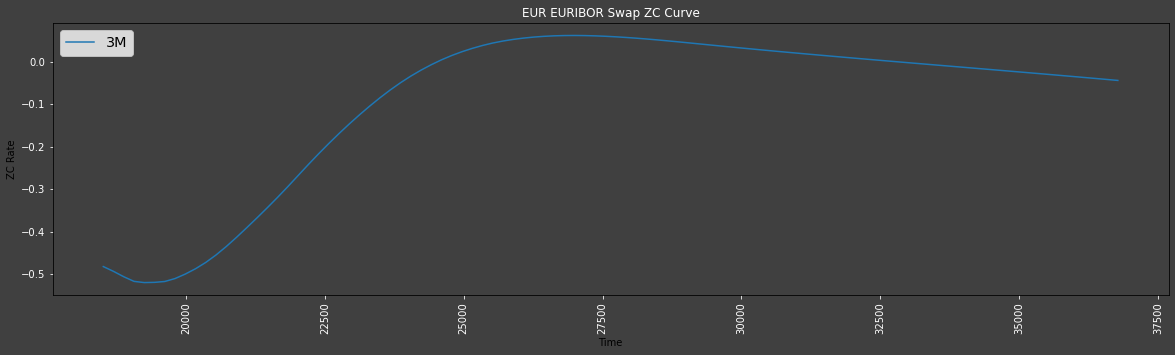

In [7]:
plot_zc_curves(response.data.raw['data'][0], ['3M'])

#### Getting our Curve points into a Dataframe

In [8]:
curves = response.data.raw['data'][0]["curves"]["3M"]["curvePoints"]
pd.DataFrame(data=curves)

,startDate,endDate,ratePercent,discountFactor,tenor,instruments
0,2020-09-07,2020-09-07,-0.481756,1.000000,0D,NaN
1,2020-09-07,2020-09-08,-0.481756,1.000013,1D,[{'instrumentCode': 'EUROND='}]
2,2020-09-07,2020-09-09,-0.481756,1.000026,2D,NaN
3,2020-09-07,2020-12-09,-0.493929,1.001259,3M,[{'instrumentCode': 'EUR0X3F=SMKR'}]
4,2020-09-07,2020-12-16,-0.494057,1.001354,3M1W,[{'instrumentCode': 'FEIcm1'}]
5,2020-09-07,2021-03-16,-0.493133,1.002577,6M,[{'instrumentCode': 'FEIcm2'}]
6,2020-09-07,2021-06-17,-0.498371,1.003881,9M,[{'instrumentCode': 'FEIcm3'}]
7,2020-09-07,2021-09-16,-0.506104,1.005212,1Y,[{'instrumentCode': 'FEIcm4'}]
8,2020-09-07,2021-12-15,-0.512109,1.006544,1Y3M,[{'instrumentCode': 'FEIcm5'}]
9,2020-09-07,2022-03-15,-0.516638,1.007893,1Y6M,[{'instrumentCode': 'FEIcm6'}]


#### Requesting Curve using Parameters 
An alternative to using the Curve ID

In [9]:
request_body={
    "universe": [
    {
        "curveParameters": {
            "valuationDate":"2020-06-30",
            "interpolationMode": "CubicSpline",
            "priceSide": "Mid",
            "interestCalculationMethod": "Dcb_Actual_Actual",
            "extrapolationMode": "Linear"
        },
        
        "curveDefinition": {
            "currency": "EUR",
            "indexName":"EURIBOR",
            "discountingTenor": "OIS",
            "indexTenors":["6M"]
        }
    }]
}

response = zcCurve_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body
)

print(json.dumps(response.data.raw, indent=2))

{
  "data": [
    {
      "curveDefinition": {
        "id": "9d619112-9ab3-45c9-b83c-eb04cbec382e",
        "mainConstituentAssetClass": "Swap",
        "riskType": "InterestRate",
        "name": "EUR EURIBOR Swap ZC Curve",
        "currency": "EUR",
        "indexName": "EURIBOR",
        "source": "Refinitiv",
        "firstHistoricalAvailabilityDate": "2008-07-14",
        "availableTenors": [
          "1M",
          "3M",
          "6M",
          "1Y",
          "OIS"
        ],
        "discountingTenor": "OIS",
        "indexTenors": [
          "6M"
        ]
      },
      "curveParameters": {
        "priceSide": "Mid",
        "interestCalculationMethod": "Dcb_Actual_Actual",
        "extrapolationMode": "Linear",
        "interpolationMode": "CubicSpline",
        "useSteps": false,
        "useConvexityAdjustment": true,
        "convexityAdjustment": {
          "volatilityPercent": 0.474,
          "meanReversionPercent": -1.3584
        },
        "useMultiDimensio

#### Implied Foreign Currencies / Currency Adjusted ZC Curves


In [10]:
request_body={
    "universe": [
        {
            "curveDefinition": {
                "currency":"EUR",
                "indexName":"EURIBOR",
                "discountingTenor": "6M",
                "referenceCurveDefinition": {
                    "currency":"USD",
                    "indexName":"LIBOR",
                    "mainConstituentAssetClass":"Swap",
                    "discountingTenor": "6M",
                }
            }            
        }]
}

response = zcCurve_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body
)


In [11]:
#print(json.dumps(response.data.raw, indent=2))

### Taking collateral currency into account

In [12]:
request_body={
    "universe": [
        {
            "curveDefinition": {
                "currency":"JPY",
                "indexName":"LIBOR",
                "discountingTenor": "OIS",
                "pivotCurveDefinition":{
                    "currency":"USD",
                    "indexName":"LIBOR",
                    "mainConstituentAssetClass":"Swap",
                    "discountingTenor": "OIS"
                },
                "referenceCurveDefinition": {
                    "currency":"EUR",
                    "indexName":"EURIBOR",
                    "discountingTenor": "OIS"
                }
            }           
        }]
}

response = zcCurve_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body
)

In [13]:
curves = response.data.raw['data'][0]["curves"]["OIS"]["curvePoints"]
pd.DataFrame(data=curves)

,startDate,endDate,ratePercent,discountFactor,tenor
0,2020-09-07,2020-09-07,-0.169469,1.000000,0D
1,2020-09-07,2020-09-16,-0.169469,1.000042,1W
2,2020-09-07,2020-10-09,-0.173942,1.000152,1M
3,2020-09-07,2020-11-09,-0.153348,1.000264,2M
4,2020-09-07,2020-12-09,-0.151312,1.000385,3M
5,2020-09-07,2021-03-09,-0.229280,1.001152,6M
6,2020-09-07,2021-06-09,-0.255687,1.001931,9M
7,2020-09-07,2021-09-07,-0.264325,1.002650,1Y
8,2020-09-07,2022-09-07,-0.718234,1.014521,2Y
9,2020-09-07,2023-09-07,-0.382042,1.011549,3Y


### User defined ZC Curves
Create ZC curves using your own constituents


In [14]:
user_defined_zc_request_body = {
	"universe": [
		{
			"curveDefinition": {
				"currency": "EUR",
				"indexName": "EURIBOR",
				"source": "UserDefined",
				"discountingTenor": "OIS"
			},
			"constituents": {
				"swapCurves": {
					"EUR": {
						"deposits": [
							{
								"basis": [
									"1M",
									"3M",
									"6M",
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUROND=",
									"template": "EUR",
									"tenor": "ON"
								}
							},
							{
								"basis": [
									"1M",
									"3M",
									"6M",
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURTND=",
									"template": "EUR",
									"tenor": "TN"
								}
							}
						],
						"fras": [
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUR1X4F=",
									"template": "EURFRA",
									"tenor": "1X3"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUR1X7F=",
									"template": "EURFRA",
									"tenor": "1X7"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUR2X8F=",
									"template": "EURFRA",
									"tenor": "2X8"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUR3X9F=",
									"template": "EURFRA",
									"tenor": "3X9"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUR4X10F=",
									"template": "EURFRA",
									"tenor": "4X10"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUR5X11F=",
									"template": "EURFRA",
									"tenor": "5X11"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUR6X12F=SMKR",
									"template": "EURFRA",
									"tenor": "6X12"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUR12X18F=",
									"template": "EURFRA",
									"tenor": "12X18"
								}
							}
						],
						"futures": [
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "FEIcm1",
									"template": "FEI"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "FEIcm2",
									"template": "FEI"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "FEIcm3",
									"template": "FEI"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "FEIcm4",
									"template": "FEI"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "FEIcm5",
									"template": "FEI"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "FEIcm6",
									"template": "FEI"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "FEIcm7",
									"template": "FEI"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "FEIcm8",
									"template": "FEI"
								}
							}
						],
						"swaps": [
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E2Y=",
									"template": "EUR_AB3E",
									"tenor": "2Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E3Y=",
									"template": "EUR_AB3E",
									"tenor": "3Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E4Y=",
									"template": "EUR_AB3E",
									"tenor": "4Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E5Y=",
									"template": "EUR_AB3E",
									"tenor": "5Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E6Y=",
									"template": "EUR_AB3E",
									"tenor": "6Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E7Y=",
									"template": "EUR_AB3E",
									"tenor": "7Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E8Y=",
									"template": "EUR_AB3E",
									"tenor": "8Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E9Y=",
									"template": "EUR_AB3E",
									"tenor": "9Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E10Y=",
									"template": "EUR_AB3E",
									"tenor": "10Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E11Y=",
									"template": "EUR_AB3E",
									"tenor": "11Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E12Y=",
									"template": "EUR_AB3E",
									"tenor": "12Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E13Y=",
									"template": "EUR_AB3E",
									"tenor": "13Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E14Y=",
									"template": "EUR_AB3E",
									"tenor": "14Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E15Y=",
									"template": "EUR_AB3E",
									"tenor": "15Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E16Y=",
									"template": "EUR_AB3E",
									"tenor": "16Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E17Y=",
									"template": "EUR_AB3E",
									"tenor": "17Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E18Y=",
									"template": "EUR_AB3E",
									"tenor": "18Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E19Y=",
									"template": "EUR_AB3E",
									"tenor": "19Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E20Y=",
									"template": "EUR_AB3E",
									"tenor": "20Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E25Y=",
									"template": "EUR_AB3E",
									"tenor": "25Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E30Y=",
									"template": "EUR_AB3E",
									"tenor": "30Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E40Y=TWEB",
									"template": "EUR_AB3E",
									"tenor": "40Y"
								}
							},
							{
								"basis": [
									"3M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB3E50Y=",
									"template": "EUR_AB3E",
									"tenor": "50Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E2Y=",
									"template": "EUR_AB6E",
									"tenor": "2Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E3Y=",
									"template": "EUR_AB6E",
									"tenor": "3Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E4Y=",
									"template": "EUR_AB6E",
									"tenor": "4Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E5Y=",
									"template": "EUR_AB6E",
									"tenor": "5Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E6Y=",
									"template": "EUR_AB6E",
									"tenor": "6Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E7Y=",
									"template": "EUR_AB6E",
									"tenor": "7Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E8Y=",
									"template": "EUR_AB6E",
									"tenor": "8Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E9Y=",
									"template": "EUR_AB6E",
									"tenor": "9Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E10Y=",
									"template": "EUR_AB6E",
									"tenor": "10Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E11Y=",
									"template": "EUR_AB6E",
									"tenor": "11Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E12Y=",
									"template": "EUR_AB6E",
									"tenor": "12Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E13Y=",
									"template": "EUR_AB6E",
									"tenor": "13Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E14Y=",
									"template": "EUR_AB6E",
									"tenor": "14Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E15Y=",
									"template": "EUR_AB6E",
									"tenor": "15Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E20Y=",
									"template": "EUR_AB6E",
									"tenor": "20Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E25Y=",
									"template": "EUR_AB6E",
									"tenor": "25Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E30Y=",
									"template": "EUR_AB6E",
									"tenor": "30Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E40Y=",
									"template": "EUR_AB6E",
									"tenor": "40Y"
								}
							},
							{
								"basis": [
									"6M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAB6E50Y=",
									"template": "EUR_AB6E",
									"tenor": "50Y"
								}
							},
							{
								"basis": [
									"1M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAM1E2M=",
									"template": "EUR_AM1E",
									"tenor": "2M"
								}
							},
							{
								"basis": [
									"1M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAM1E3M=",
									"template": "EUR_AM1E",
									"tenor": "3M"
								}
							},
							{
								"basis": [
									"1M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAM1E4M=",
									"template": "EUR_AM1E",
									"tenor": "4M"
								}
							},
							{
								"basis": [
									"1M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAM1E5M=",
									"template": "EUR_AM1E",
									"tenor": "5M"
								}
							},
							{
								"basis": [
									"1M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAM1E6M=",
									"template": "EUR_AM1E",
									"tenor": "6M"
								}
							},
							{
								"basis": [
									"1M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAM1E7M=",
									"template": "EUR_AM1E",
									"tenor": "7M"
								}
							},
							{
								"basis": [
									"1M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAM1E8M=",
									"template": "EUR_AM1E",
									"tenor": "8M"
								}
							},
							{
								"basis": [
									"1M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAM1E9M=",
									"template": "EUR_AM1E",
									"tenor": "9M"
								}
							},
							{
								"basis": [
									"1M"
								],
								"instrumentDefinition": {
									"instrumentCode": "EURAM1E1Y=",
									"template": "EUR_AM1E",
									"tenor": "12M"
								}
							}
						],
						"ois": [
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREONSW=",
									"template": "OIS_EONIA",
									"tenor": "SW"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON2W=",
									"template": "OIS_EONIA",
									"tenor": "2W"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON3W=",
									"template": "OIS_EONIA",
									"tenor": "3W"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON1M=",
									"template": "OIS_EONIA",
									"tenor": "1M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON2M=",
									"template": "OIS_EONIA",
									"tenor": "2M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON3M=",
									"template": "OIS_EONIA",
									"tenor": "3M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON4M=",
									"template": "OIS_EONIA",
									"tenor": "4M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON5M=",
									"template": "OIS_EONIA",
									"tenor": "5M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON6M=",
									"template": "OIS_EONIA",
									"tenor": "6M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON7M=",
									"template": "OIS_EONIA",
									"tenor": "7M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON8M=",
									"template": "OIS_EONIA",
									"tenor": "8M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON9M=",
									"template": "OIS_EONIA",
									"tenor": "9M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON10M=",
									"template": "OIS_EONIA",
									"tenor": "10M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON11M=",
									"template": "OIS_EONIA",
									"tenor": "11M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON1Y=",
									"template": "OIS_EONIA",
									"tenor": "1Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON15M=",
									"template": "OIS_EONIA",
									"tenor": "15M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON18M=",
									"template": "OIS_EONIA",
									"tenor": "18M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON21M=",
									"template": "OIS_EONIA",
									"tenor": "21M"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON2Y=",
									"template": "OIS_EONIA",
									"tenor": "2Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON3Y=",
									"template": "OIS_EONIA",
									"tenor": "3Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON4Y=",
									"template": "OIS_EONIA",
									"tenor": "4Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON5Y=",
									"template": "OIS_EONIA",
									"tenor": "5Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON6Y=",
									"template": "OIS_EONIA",
									"tenor": "6Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON7Y=",
									"template": "OIS_EONIA",
									"tenor": "7Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON8Y=",
									"template": "OIS_EONIA",
									"tenor": "8Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON9Y=",
									"template": "OIS_EONIA",
									"tenor": "9Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON10Y=",
									"template": "OIS_EONIA",
									"tenor": "10Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON11Y=",
									"template": "OIS_EONIA",
									"tenor": "11Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON12Y=",
									"template": "OIS_EONIA",
									"tenor": "12Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON15Y=",
									"template": "OIS_EONIA",
									"tenor": "15Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON20Y=",
									"template": "OIS_EONIA",
									"tenor": "20Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON25Y=",
									"template": "OIS_EONIA",
									"tenor": "25Y"
								}
							},
							{
								"basis": [
									"OIS"
								],
								"instrumentDefinition": {
									"instrumentCode": "EUREON30Y=",
									"template": "OIS_EONIA",
									"tenor": "30Y"
								}
							}
						]
					}
				}
			}
		}
	],
	"outputs": [
		"DetailedCurvePoint"
	]
}



user_defined_zc_response = zcCurve_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = user_defined_zc_request_body
)

print(json.dumps(user_defined_zc_response.data.raw, indent=2))

{
  "data": [
    {
      "curveDefinition": {
        "currency": "EUR",
        "indexName": "EURIBOR",
        "source": "UserDefined",
        "discountingTenor": "OIS"
      },
      "curveParameters": {
        "priceSide": "Mid",
        "interestCalculationMethod": "Dcb_Actual_Actual",
        "extrapolationMode": "None",
        "interpolationMode": "CubicDiscount",
        "useSteps": false,
        "useConvexityAdjustment": true,
        "convexityAdjustment": {
          "volatilityPercent": 0.479,
          "meanReversionPercent": -1.2999
        },
        "useMultiDimensionalSolver": true,
        "calendarAdjustment": "Calendar",
        "calendars": [
          "EMU_FI"
        ],
        "valuationDate": "2020-09-07"
      },
      "curves": {
        "OIS": {
          "isDiscountCurve": true,
          "curvePoints": [
            {
              "startDate": "2020-09-07",
              "endDate": "2020-09-07",
              "ratePercent": -0.4817556694659997,
     

In [15]:
curves = user_defined_zc_response.data.raw['data'][0]["curves"]["3M"]["curvePoints"]
pd.DataFrame(data=curves)

,startDate,endDate,ratePercent,discountFactor,tenor,instruments
0,2020-09-07,2020-09-07,-0.481756,1.000000,0D,NaN
1,2020-09-07,2020-09-08,-0.481756,1.000013,1D,"[{'instrumentCode': 'EUROND=', 'value': -0.475..."
2,2020-09-07,2020-09-09,-0.481756,1.000026,2D,"[{'instrumentCode': 'EURTND=', 'value': -0.475..."
3,2020-09-07,2020-10-09,-0.481756,1.000422,1M,NaN
4,2020-09-07,2020-12-09,-0.491843,1.001254,3M,"[{'instrumentCode': 'EUR1X4F=', 'value': -0.49}]"
5,2020-09-07,2020-12-16,-0.493457,1.001352,3M1W,"[{'instrumentCode': 'FEIcm1', 'value': 100.4875}]"
6,2020-09-07,2021-03-16,-0.492818,1.002575,6M,"[{'instrumentCode': 'FEIcm2', 'value': 100.4875}]"
7,2020-09-07,2021-06-17,-0.498160,1.003880,9M,"[{'instrumentCode': 'FEIcm3', 'value': 100.5025}]"
8,2020-09-07,2021-09-16,-0.505944,1.005211,1Y,"[{'instrumentCode': 'FEIcm4', 'value': 100.522..."
9,2020-09-07,2021-12-15,-0.511980,1.006543,1Y3M,"[{'instrumentCode': 'FEIcm5', 'value': 100.5275}]"


### Interest Rate swap examples
Using the Financial Contracts API

In [16]:
financial_contract_endpoint = rdp.Endpoint(session, 
            'https://api.refinitiv.com/data/quantitative-analytics/v1/financial-contracts')

 A vanilla AUD Interest Rate Swap based on the BBSW index

In [17]:
request_body = {
    
    "fields" : ["InstrumentTag","MarketValueInDealCcy","DirtyPricePercent","FixedRatePercent","DiscountCurveName","ForwardCurveName","ErrorCode","ErrorMessage"],
    
    "universe" : [
        {
            "instrumentType":"Swap",
            "instrumentDefinition": {
                "instrumentTag":"IRS-AUD BBSW 3M - 2Y",
                "startDate":"2020-07-29",
                "tenor":"5Y",
                "legs":[
                {
                    "direction":"Paid",
                    "interestType":"Fixed",
                    "notionalCcy":"AUD",
                    "interestPaymentFrequency":"Annual",
                    "interestCalculationMethod":"Dcb_Actual_365",
                },
                {
                    "direction":"Received",
                    "interestType":"Float",
                    "interestPaymentFrequency":"SemiAnnual",
                    "interestCalculationMethod":"Dcb_Actual_365",
                    "notionalCcy":"AUD",
                    "indexName":"BBSW",
                    "indexTenor":"6M",
                }]
            }
        }],
    
    "pricingParameters": {
        "valuationDate": "2020-7-27T00:00:00Z",
    },
        
    "outputs" : ["Data","Headers"],

}

response = financial_contract_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body)

print(json.dumps(response.data.raw, indent=2))

{
  "headers": [
    {
      "type": "String",
      "name": "InstrumentTag"
    },
    {
      "type": "Float",
      "name": "MarketValueInDealCcy"
    },
    {
      "type": "Float",
      "name": "DirtyPricePercent"
    },
    {
      "type": "Float",
      "name": "FixedRatePercent"
    },
    {
      "type": "String",
      "name": "DiscountCurveName"
    },
    {
      "type": "String",
      "name": "ForwardCurveName"
    },
    {
      "type": "String",
      "name": "ErrorCode"
    },
    {
      "type": "String",
      "name": "ErrorMessage"
    }
  ],
  "data": [
    [
      "IRS-AUD BBSW 3M - 2Y",
      18380.6570000003,
      1.83806570000003,
      0.370641356748756,
      "AUD - Swap vs 6M BBSW",
      null,
      "",
      ""
    ],
    [
      "IRS-AUD BBSW 3M - 2Y",
      18380.6570000003,
      1.83806570000003,
      null,
      "AUD - Swap vs 6M BBSW",
      "AUD - Swap vs 6M BBSW",
      "",
      ""
    ]
  ]
}


In [18]:
headers_name = [h['name'] for h in response.data.raw['headers']]
pd.DataFrame(data=response.data.raw['data'], columns=headers_name)

,InstrumentTag,MarketValueInDealCcy,DirtyPricePercent,FixedRatePercent,DiscountCurveName,ForwardCurveName,ErrorCode,ErrorMessage
0,IRS-AUD BBSW 3M - 2Y,18380.657,1.838066,0.370641,AUD - Swap vs 6M BBSW,None,,
1,IRS-AUD BBSW 3M - 2Y,18380.657,1.838066,NaN,AUD - Swap vs 6M BBSW,AUD - Swap vs 6M BBSW,,


### Currency Basis Swap USD / JPY - a fixed USD leg vs. a 6M JPY Libor leg

In [19]:
request_body = {
    
    "fields" : ["InstrumentTag","CleanMarketValueInDealCcy","MarketValueInDealCcy","AccruedAmountInDealCcy",\
                "AccruedPercent","CleanPricePercent","DirtyPricePercent","CleanPricePercent","PV01Bp",\
                "PV01AmountInDealCcy","DiscountCurveName","ForwardCurveName","ErrorCode","ErrorMessage"],
    
    "universe" : [
    {
        "instrumentType":"Swap",
        "instrumentDefinition": {
            "instrumentTag":"CCS-USD 1 EURIBOR-2Y",
            "startDate":"2019-10-28",
            "tenor":"5Y",
            "legs":[
            {
                "direction":"Paid",
                "interestType":"Fixed",
                "fixedRatePercent":3.072,
                "notionalCcy":"USD",
                "interestPaymentFrequency":"SemiAnnual",
                "interestCalculationMethod":"Dcb_30_360",
            },
            {
                "direction":"Received",
                "interestType":"Float",
                "interestPaymentFrequency":"SemiAnnual",
                "interestCalculationMethod":"Dcb_Actual_360",
                "notionalCcy":"JPY",
                "indexName":"LIBOR",
                "indexTenor":"6M",
            }]
        }
    }],
    
    "pricingParameters": {
        "valuationDate": "2020-01-18T00:00:00Z",
        
    },
        
    "outputs" : ["Data","Headers"],

}

response = financial_contract_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body)

#print(json.dumps(response.data.raw, indent=2))

In [20]:
headers_name = [h['name'] for h in response.data.raw['headers']]
pd.DataFrame(data=response.data.raw['data'], columns=headers_name)

,InstrumentTag,CleanMarketValueInDealCcy,MarketValueInDealCcy,AccruedAmountInDealCcy,AccruedPercent,CleanPricePercent,DirtyPricePercent,CleanPricePercent,PV01Bp,PV01AmountInDealCcy,DiscountCurveName,ForwardCurveName,ErrorCode,ErrorMessage
0,CCS-USD 1 EURIBOR-2Y,1.062848e+06,1.069675e+06,6826.666667,0.682667,106.284804,106.967471,106.284804,4.692319,469.231865,USD 6M disc. USD curve,None,,
1,CCS-USD 1 EURIBOR-2Y,1.055913e+06,1.058022e+06,2108.599567,0.213182,106.754288,106.967471,106.754288,0.463282,5047.693157,USD 6M disc. JPY curve,"JPY 6M disc. JPY curve, 6M index tenor",,
